In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd

In [3]:

def makeData():
    
    mu = 0.5
    sigma = 0.2

    mu1 = -0.5
    sigma1 = 0.2

    x_cor = np.random.normal(mu, sigma, 100)
    y_cor = np.random.normal(mu, sigma, 100)

    x1_cor = np.random.normal(mu1, sigma1, 100)
    y1_cor = np.random.normal(mu1, sigma1, 100)
    
    plt.scatter(x_cor,y_cor,s=10)
    plt.scatter(x1_cor,y1_cor,s=10)

    X_ = pd.DataFrame()
    X_['1'] = list(x_cor) + list(x1_cor)
    X_['2'] = list(y_cor) + list(y1_cor)
    X_['op'] = [1]*100 + [0]*100
    
    X_ = X_.sample(frac=1).reset_index(drop=True) 
    X = X_.iloc[:,:-1].to_numpy()
    
    b = X_.iloc[:,-1].to_numpy()
    y = np.zeros((b.size, b.max()+1))
    y[np.arange(b.size),b] = 1

    weights = np.random.rand(X.shape[1],len(y[0]))
    
    return X,y,weights
    

In [4]:
def data_gen():
    
    data = sns.load_dataset('iris')
    
    #Prepare the training set
    data['species'] = data['species'].astype('category')
    data['encode_species'] = data['species'].cat.codes

    data = data.sample(frac=1).reset_index(drop=True)
    
    #X = feature values, all the columns except the last column
    X = data.iloc[:, :-2].to_numpy()

    # y = target values, last column of the data frame
    b = data.iloc[:, -1].to_numpy()
    y = np.zeros((b.size, b.max()+1))
    y[np.arange(b.size),b] = 1

    #each class will have weight vector
    weights = np.random.rand(X.shape[1],b.max()+1)
    
    #print(X.shape,y.shape,weights.shape)
    return X,y,weights


In [5]:
def predict(test_data,y_test,w):
    
    y_pred = list(np.argmax(softmax(test_data.dot(w)),axis=1))
    y_max = list(np.argmax(y_test,axis=1))
    
    return sum([1 for i in range(len(y_max)) if y_max[i] == y_pred[i]]) / len(y_test) * 100
    

def softmax(x):
    
    exp_values = np.exp(x - np.max(x,axis=1,keepdims=True))
    res =  exp_values / np.sum(exp_values,axis=1,keepdims=True)
    return res

def loss_func(y,all_exp_wx,no_classes):
    
    loss_sum = 0
    res = softmax(all_exp_wx)
    idx_max = np.argmax(res,axis=1)
    r = []
    for idx,i in enumerate(idx_max):
        ans = [0]*no_classes
        loss_sum -= np.log(res[idx][i])
        ans[i] = res[idx][i]
        r.append(ans)
    
    return loss_sum,np.array(r)


def train_test_split_fn(X,y,test_ratio):
    
    return train_test_split(X,y,test_size=test_ratio)
    


Accuracy of Testing  70.0
Accuracy of Training  63.33333333333333
-----------Loss Plot-----------------


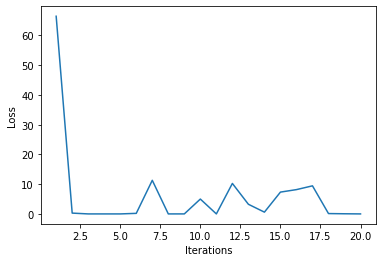

In [25]:
def gradient_descent(params,X,y,iterations,alpha,classes):
    
    cost_history = np.zeros((iterations,1))
    
    for i in range(iterations):
        loss,w_update = loss_func(y,X.dot(params),classes)
        cost_history[i] += loss
        params = params + alpha * X.T.dot((y-w_update))
        
    return cost_history,params


def make_plot(iterations,costs):
    
    plt.plot(range(1,iterations+1),costs)
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.show()
    
    
def main():
    
    #parameters initializations
    iterations = 20
    alpha = 0.002
    
    
    '''Uncomment to run iris dataset for multi-class classification
    The accuracy is pretty less because data is not linearly separable hence
    '''
    X,y,weights = data_gen()

    #2 classes classification, generating data from scratch
    #X,y,weights = makeData()
    
    classes = len(y[0])
    
    #making train test split
    X_train,X_test,y_train,y_test = train_test_split_fn(X,y,0.2)

    #computing the multi-class logistic regression from scratch
    costs,p = gradient_descent(weights,X_train,y_train,iterations,0.01,classes)

    #make prediction
    print('Accuracy of Testing ',predict(X_test,y_test,p))
    print('Accuracy of Training ',predict(X_train,y_train,p))
    
    print('-----------Loss Plot-----------------')
    make_plot(iterations,costs)
    
main()

#Accuarcy for cooked up dataset

Accuracy of Testing:  100
Accuracy of Training:  100
